In [1]:
## quick tutorial on fourier transform
##  a mathematical method that expresses a function as the sum of sinusoidal functions (sine waves)
## tutorial url:
## https://github.com/thatSaneKid/fourier/blob/master/Fourier%20Transform%20-%20A%20Visual%20Introduction.ipynb

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

#### Generating the signal

We will be using a cosine wave of 3 Hz frequency, as the input signal.

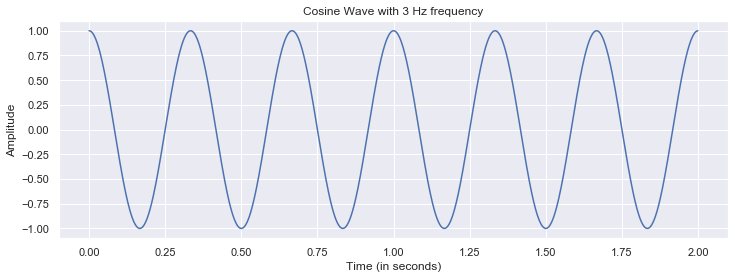

In [4]:
f = 3.0
t = np.arange(0,2,0.001) 

cos_wave = np.cos(2*np.pi*f*t)
# cos_wave = 2*m.cos(2*np.pi*f*t) + 5*m.cos(2*np.pi*f*2*t)

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(t,cos_wave)
plt.title("Cosine Wave with 3 Hz frequency")
plt.ylabel("Amplitude")
plt.xlabel('Time (in seconds)');

#### Warping the input signal wave around

Just to summarise the idea put forth in the video, we need to try warping the input signal graph for a number of sampling frequencies and then by keeping the track of the x-coordinate of the center of mass, considering the warped graph as a piece made of metal wire, we can estimate the frequencies present in the input signal.
The range for frequency search is kept here as 0 to 10 Hz.

In [5]:
r_cord = []
min_freq_range = 0.0
max_freq_range = 10.0
sf_list = np.arange(min_freq_range, max_freq_range, 0.1)
for sf in sf_list:
    r_cord.append( [(cos_wave[i], t[i]*sf*2*np.pi) for i in range(len(t)) ] )

In [6]:
x_cord , y_cord = [], []
for l in range(len(r_cord)):
    x_cord.append( [amp*np.cos(theta) for (amp,theta) in r_cord[l]] )
    y_cord.append( [amp*np.sin(theta) for (amp,theta) in r_cord[l]] )

Below cell plots all the beautiful curves that pop up while doing this for each value of the sampling frequency in our list.
Will take a little bit of time to execute, because the number of plots may be high, and once every plot is made, only then the whole figure pops up.
Totally worth the wait !! The Red dot denotes the Center of Mass of the graph.

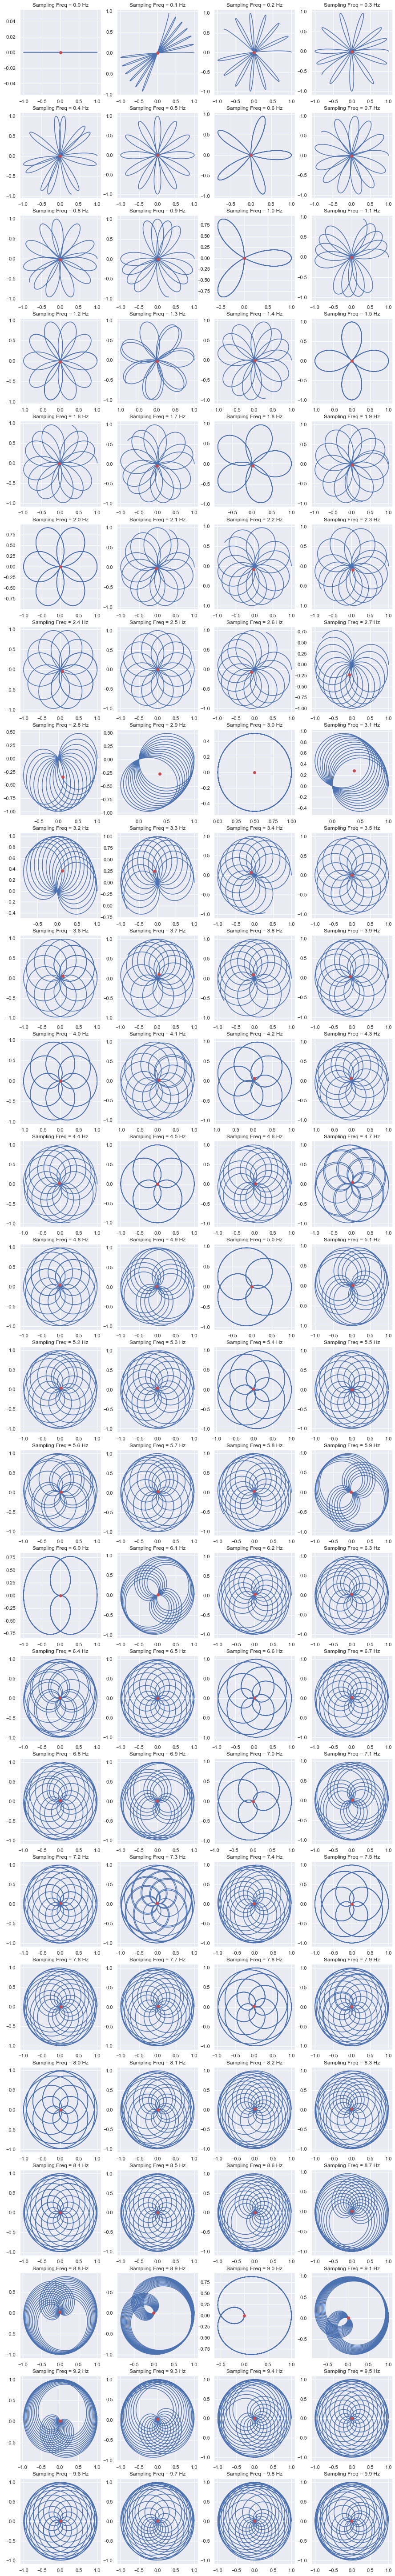

In [7]:
mean_list = []

plt.rcParams["figure.figsize"] = (15,110)
for l in range(len(r_cord)):
    plt.subplot(int(len(r_cord)/4)+1, 4, int(l+1))
    plt.plot(x_cord[l], y_cord[l])
    plt.plot(np.mean(x_cord[l]), np.mean(y_cord[l]), 'or' )
    plt.title("Sampling Freq = "+str(round(sf_list[l], 2))+" Hz")
    
    # Storing the COM for plotting later
    x_mean = np.sum(x_cord[l])
    mean_list.append(x_mean)

#### Plotting COM v/s Sampling Frequency

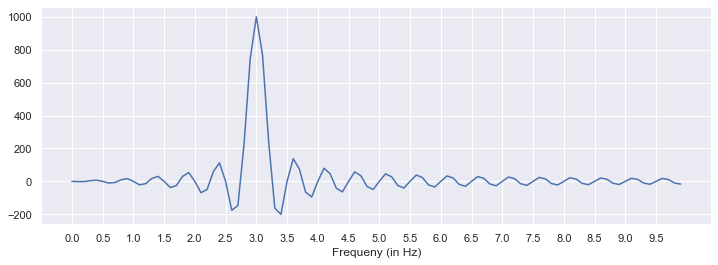

In [9]:
plt.rcParams["figure.figsize"] = (12,4)
plt.xlabel("Frequeny (in Hz)")
plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5))
sns.set()
plt.plot(sf_list,mean_list);

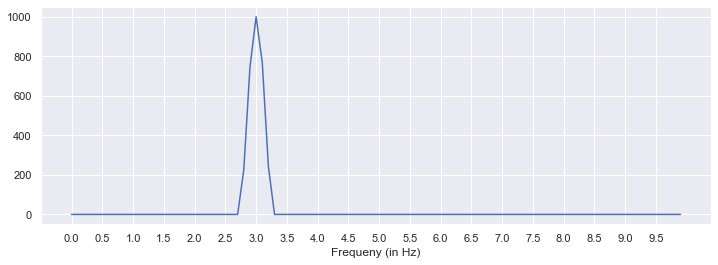

In [11]:
plt.rcParams["figure.figsize"] = (12,4)
smoothed = [i if i>0 and i>0.2*max(mean_list) else 0 for i in mean_list]
plt.plot(sf_list, smoothed)
plt.xlabel("Frequeny (in Hz)")
plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5));

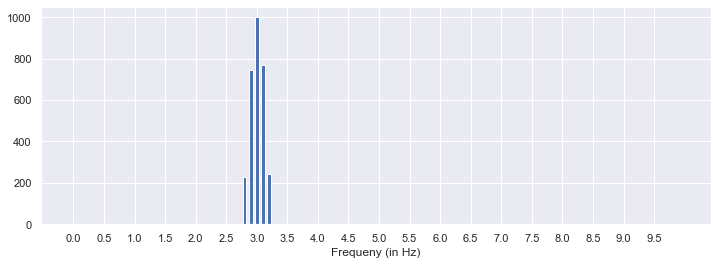

In [12]:
plt.rcParams["figure.figsize"] = (12,4)
plt.xticks(np.arange(min(sf_list), max(sf_list), 0.5))
plt.xlabel("Frequeny (in Hz)")
plt.bar(sf_list, smoothed, width = 0.06);